# Task 1: Exploratory Data Analysis

In [15]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import os

%config InlineBackend.figure_format = 'retina'

**1. Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data? *[0.5 marks]***

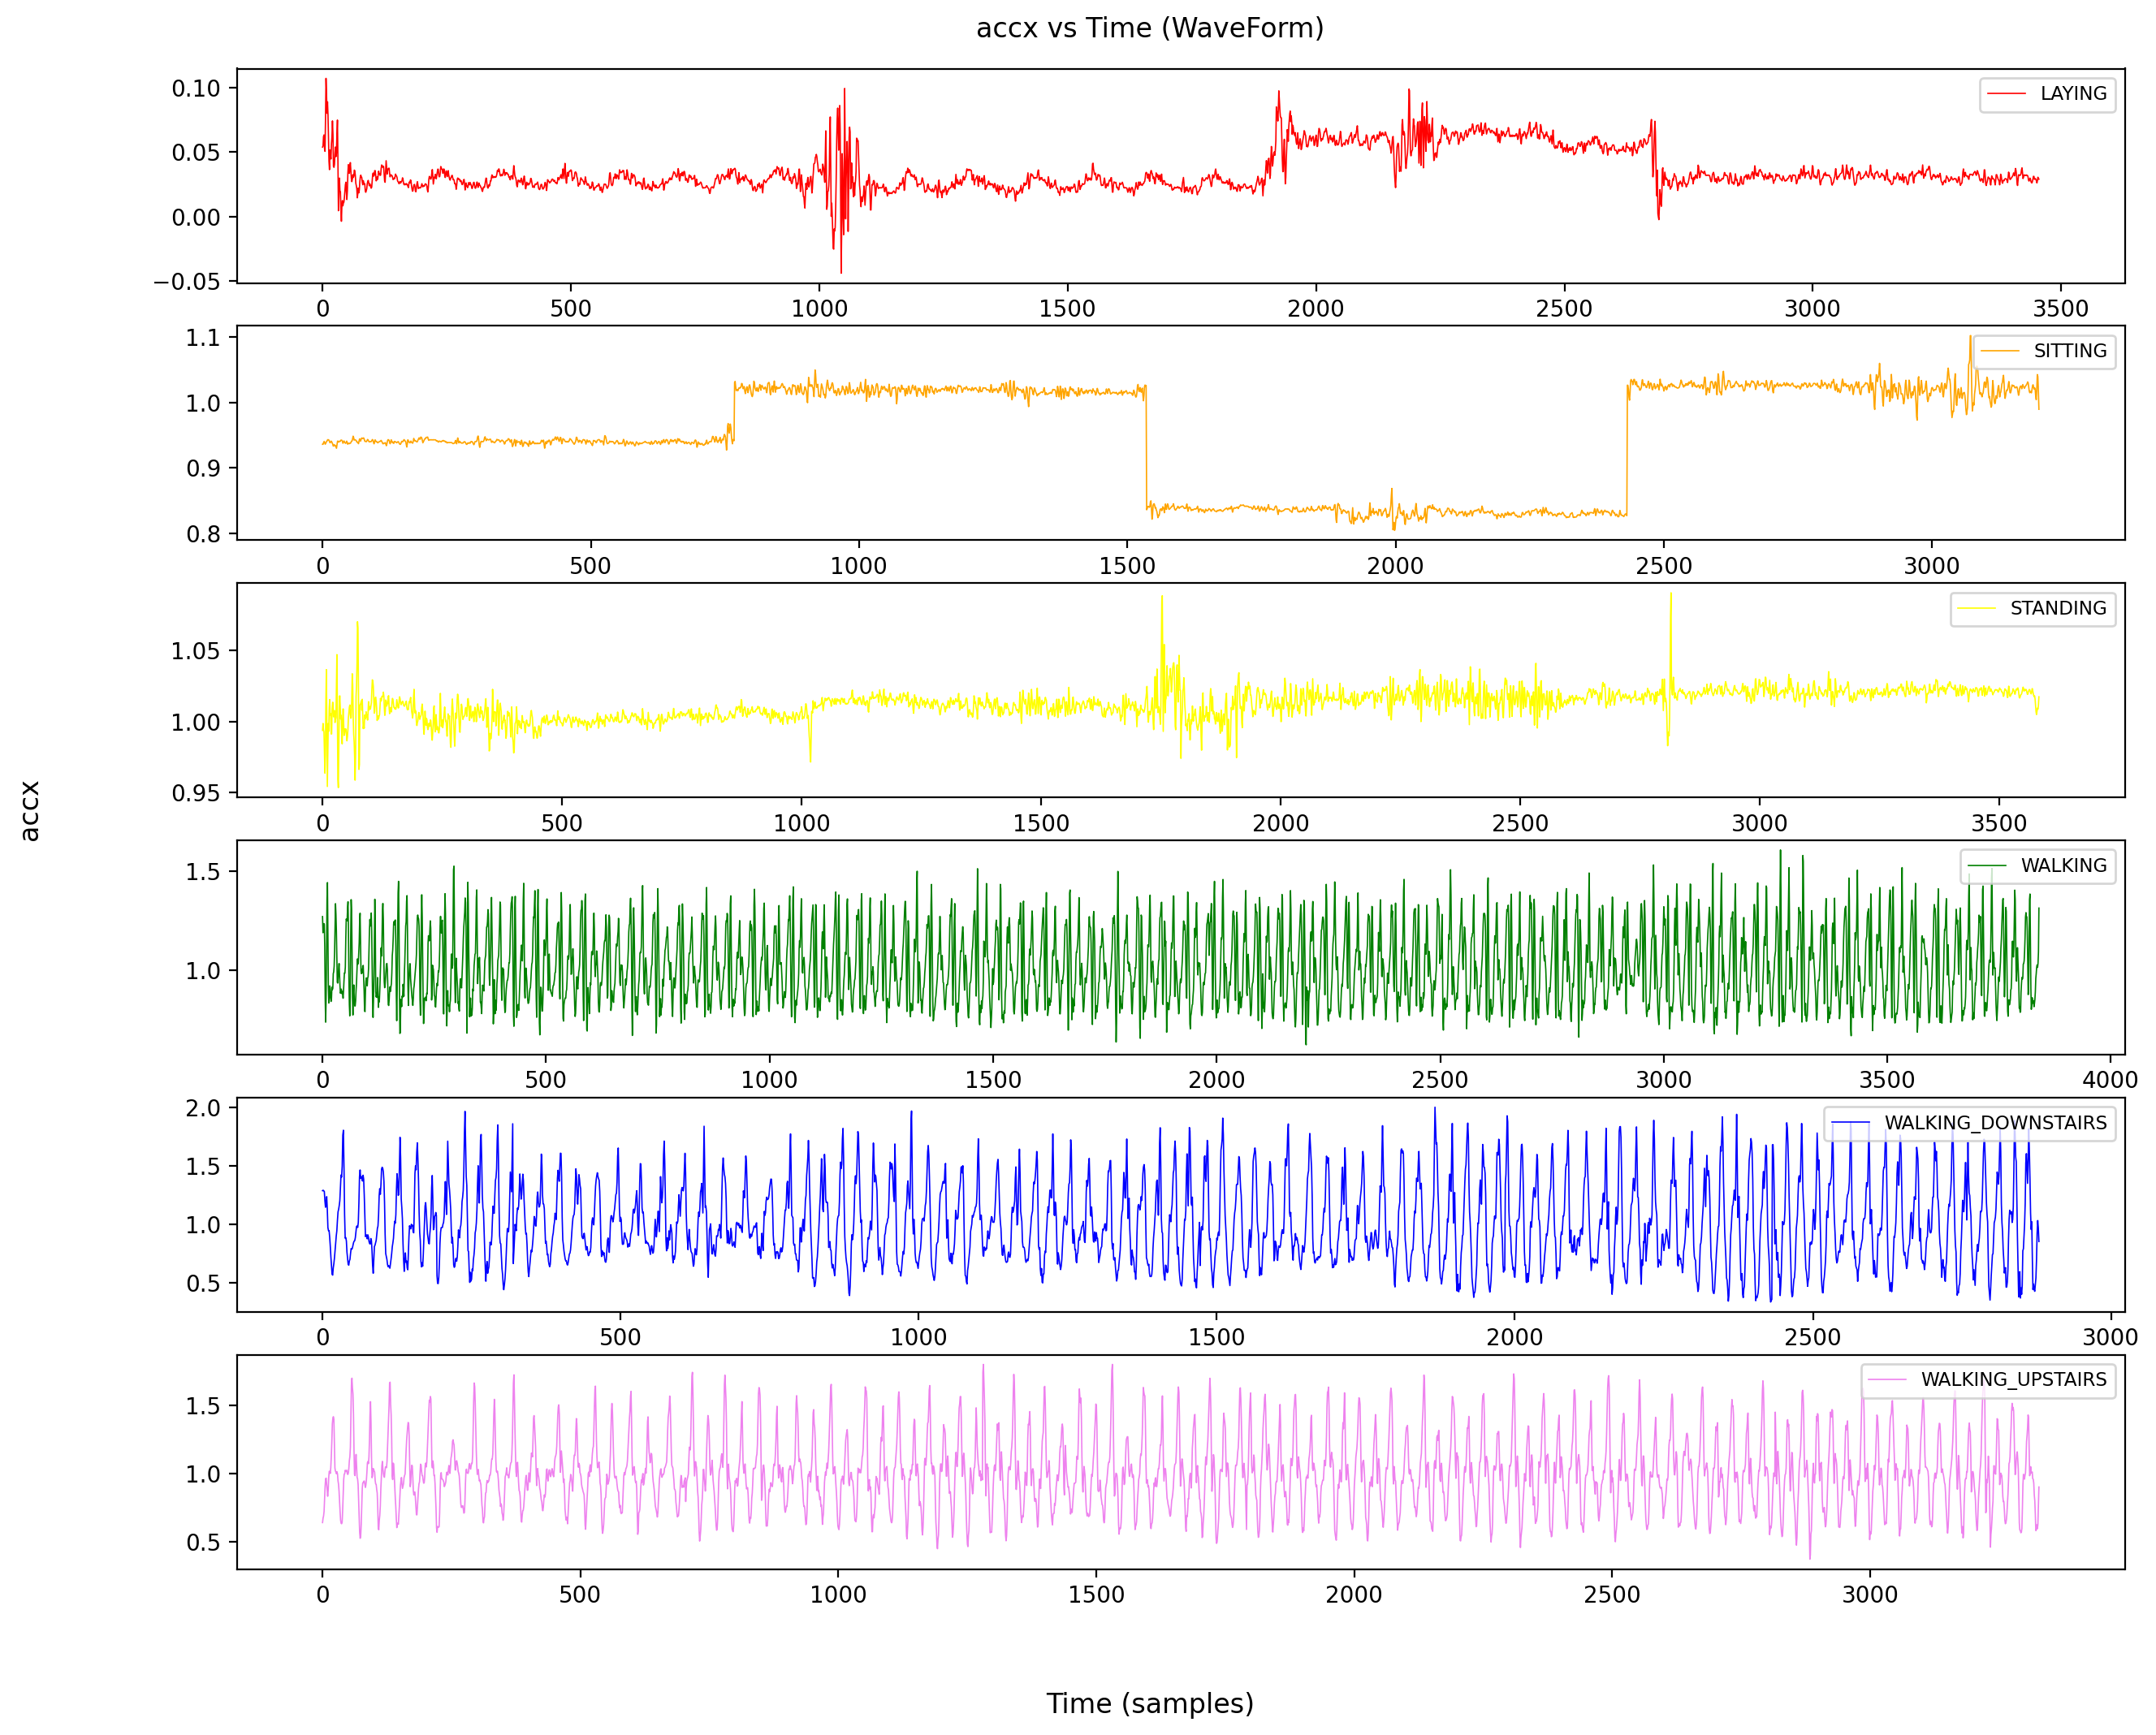

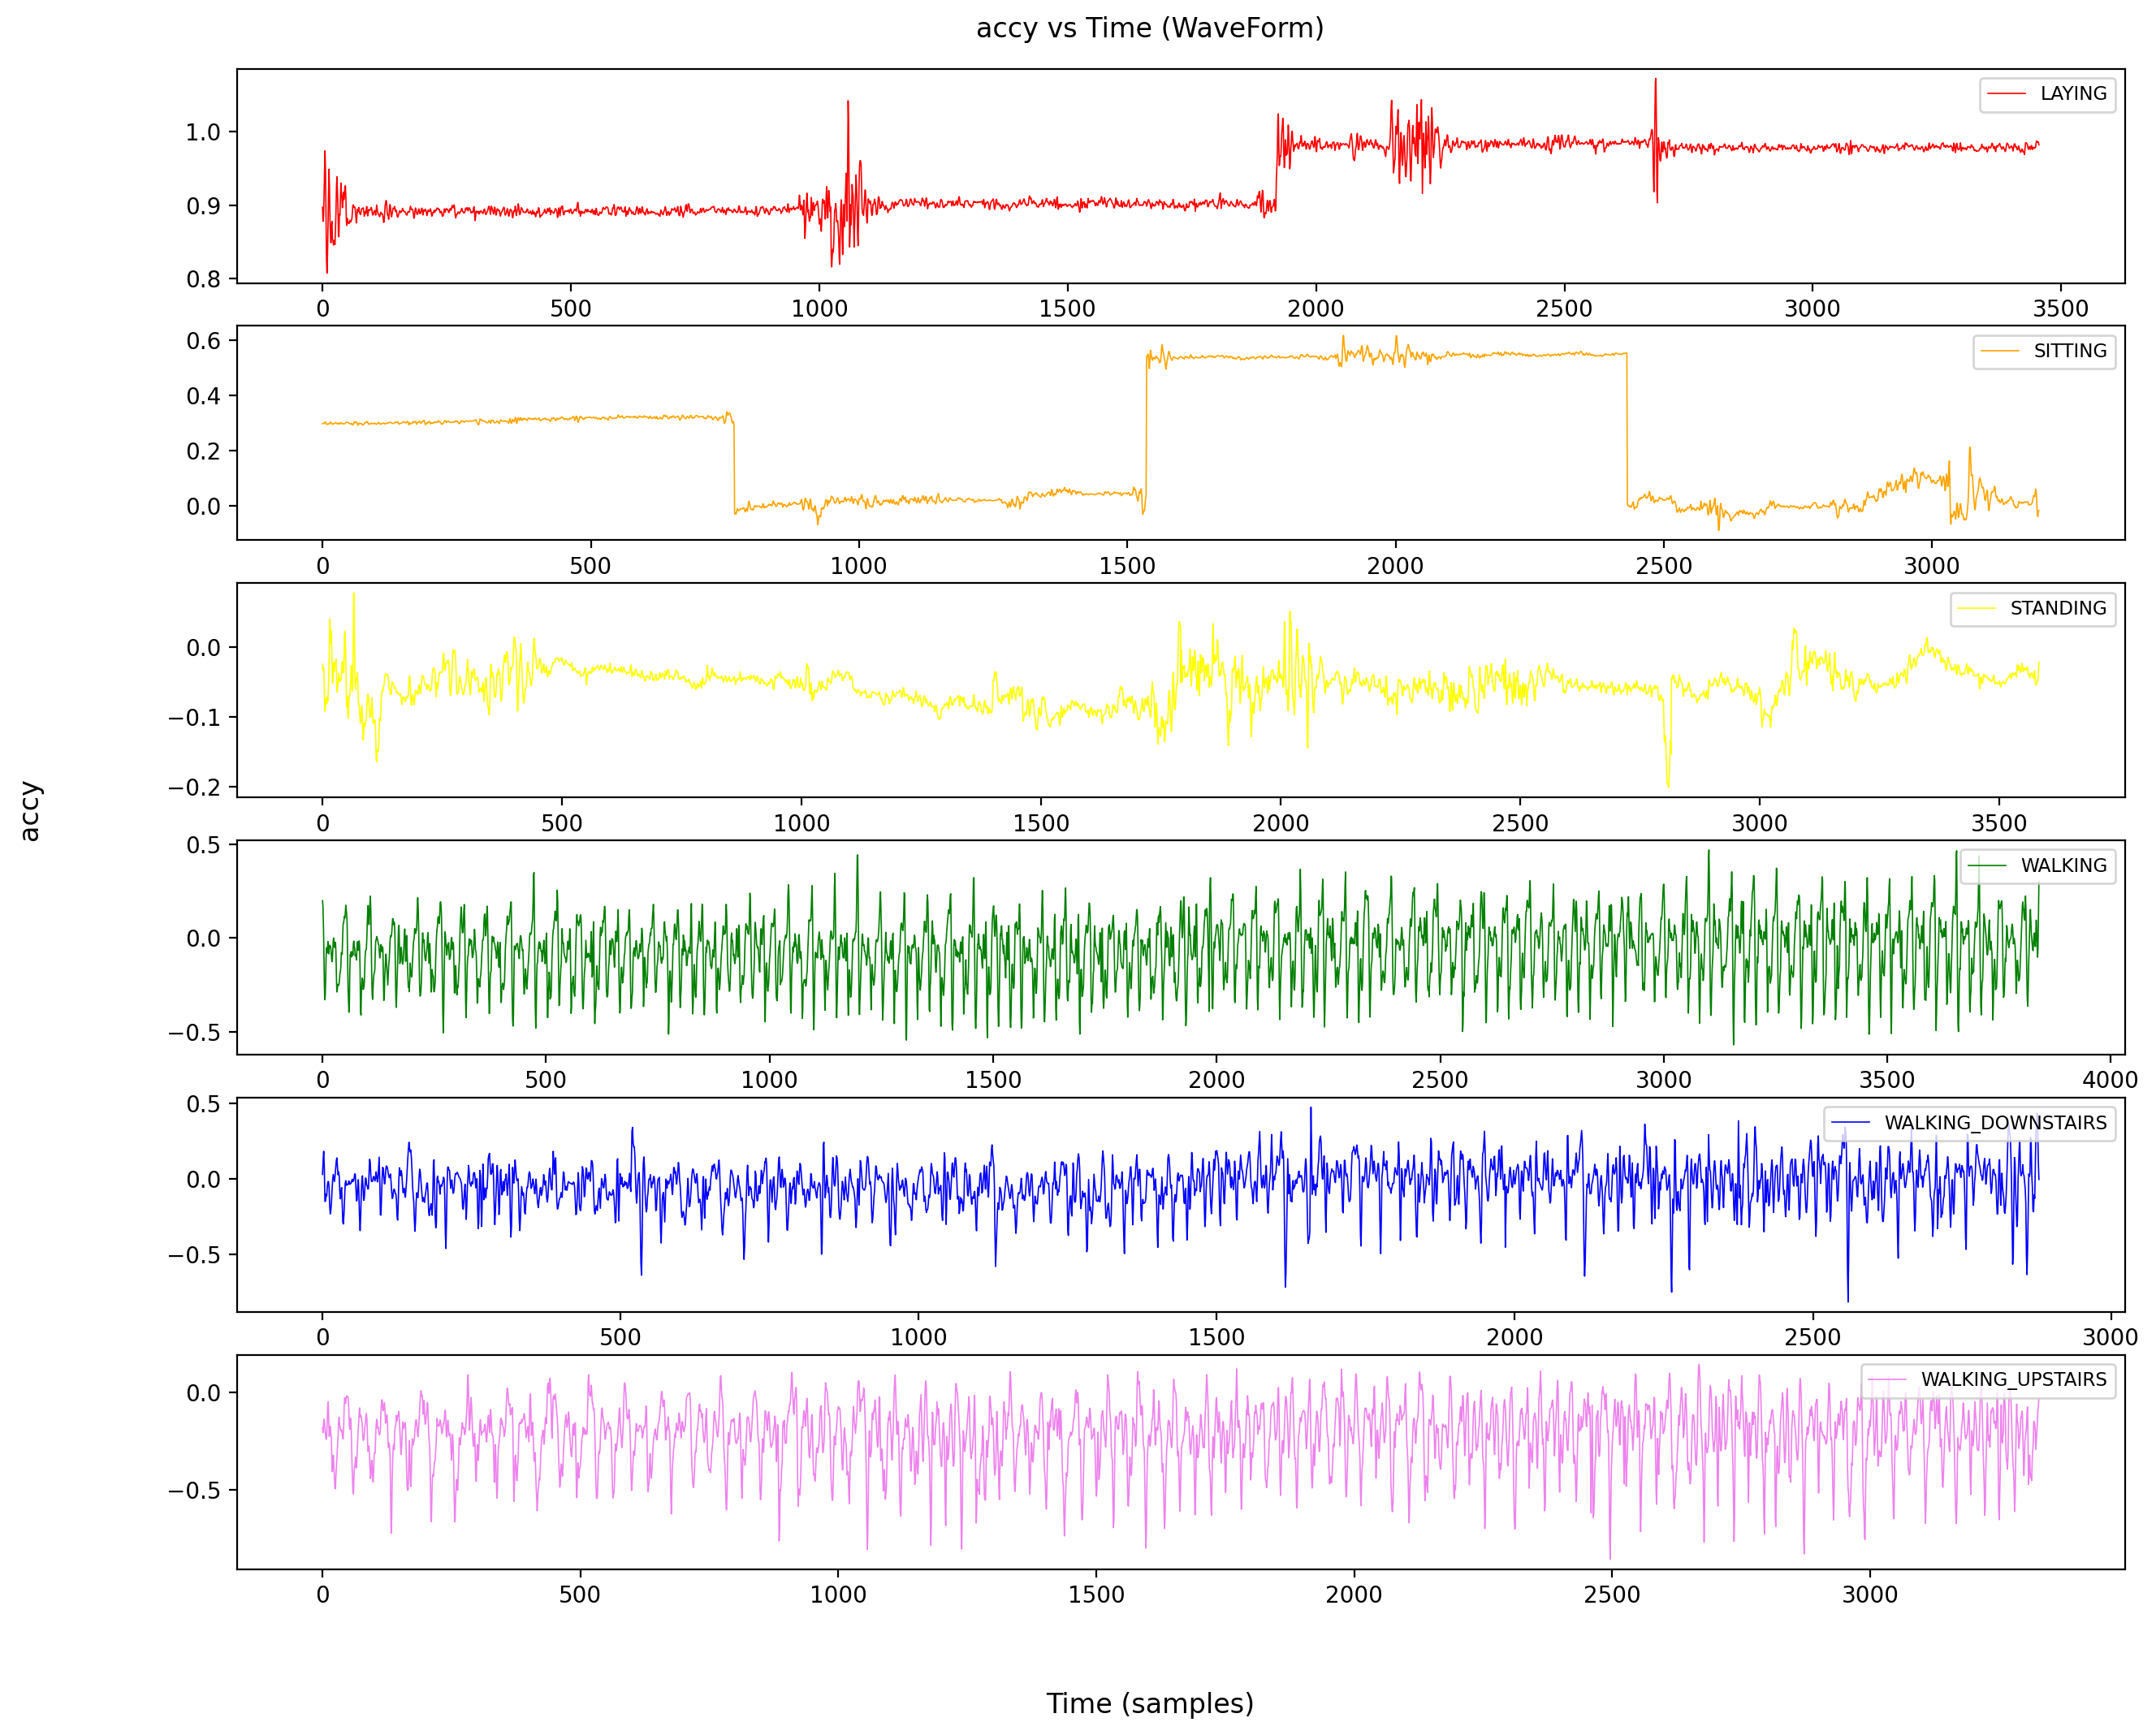

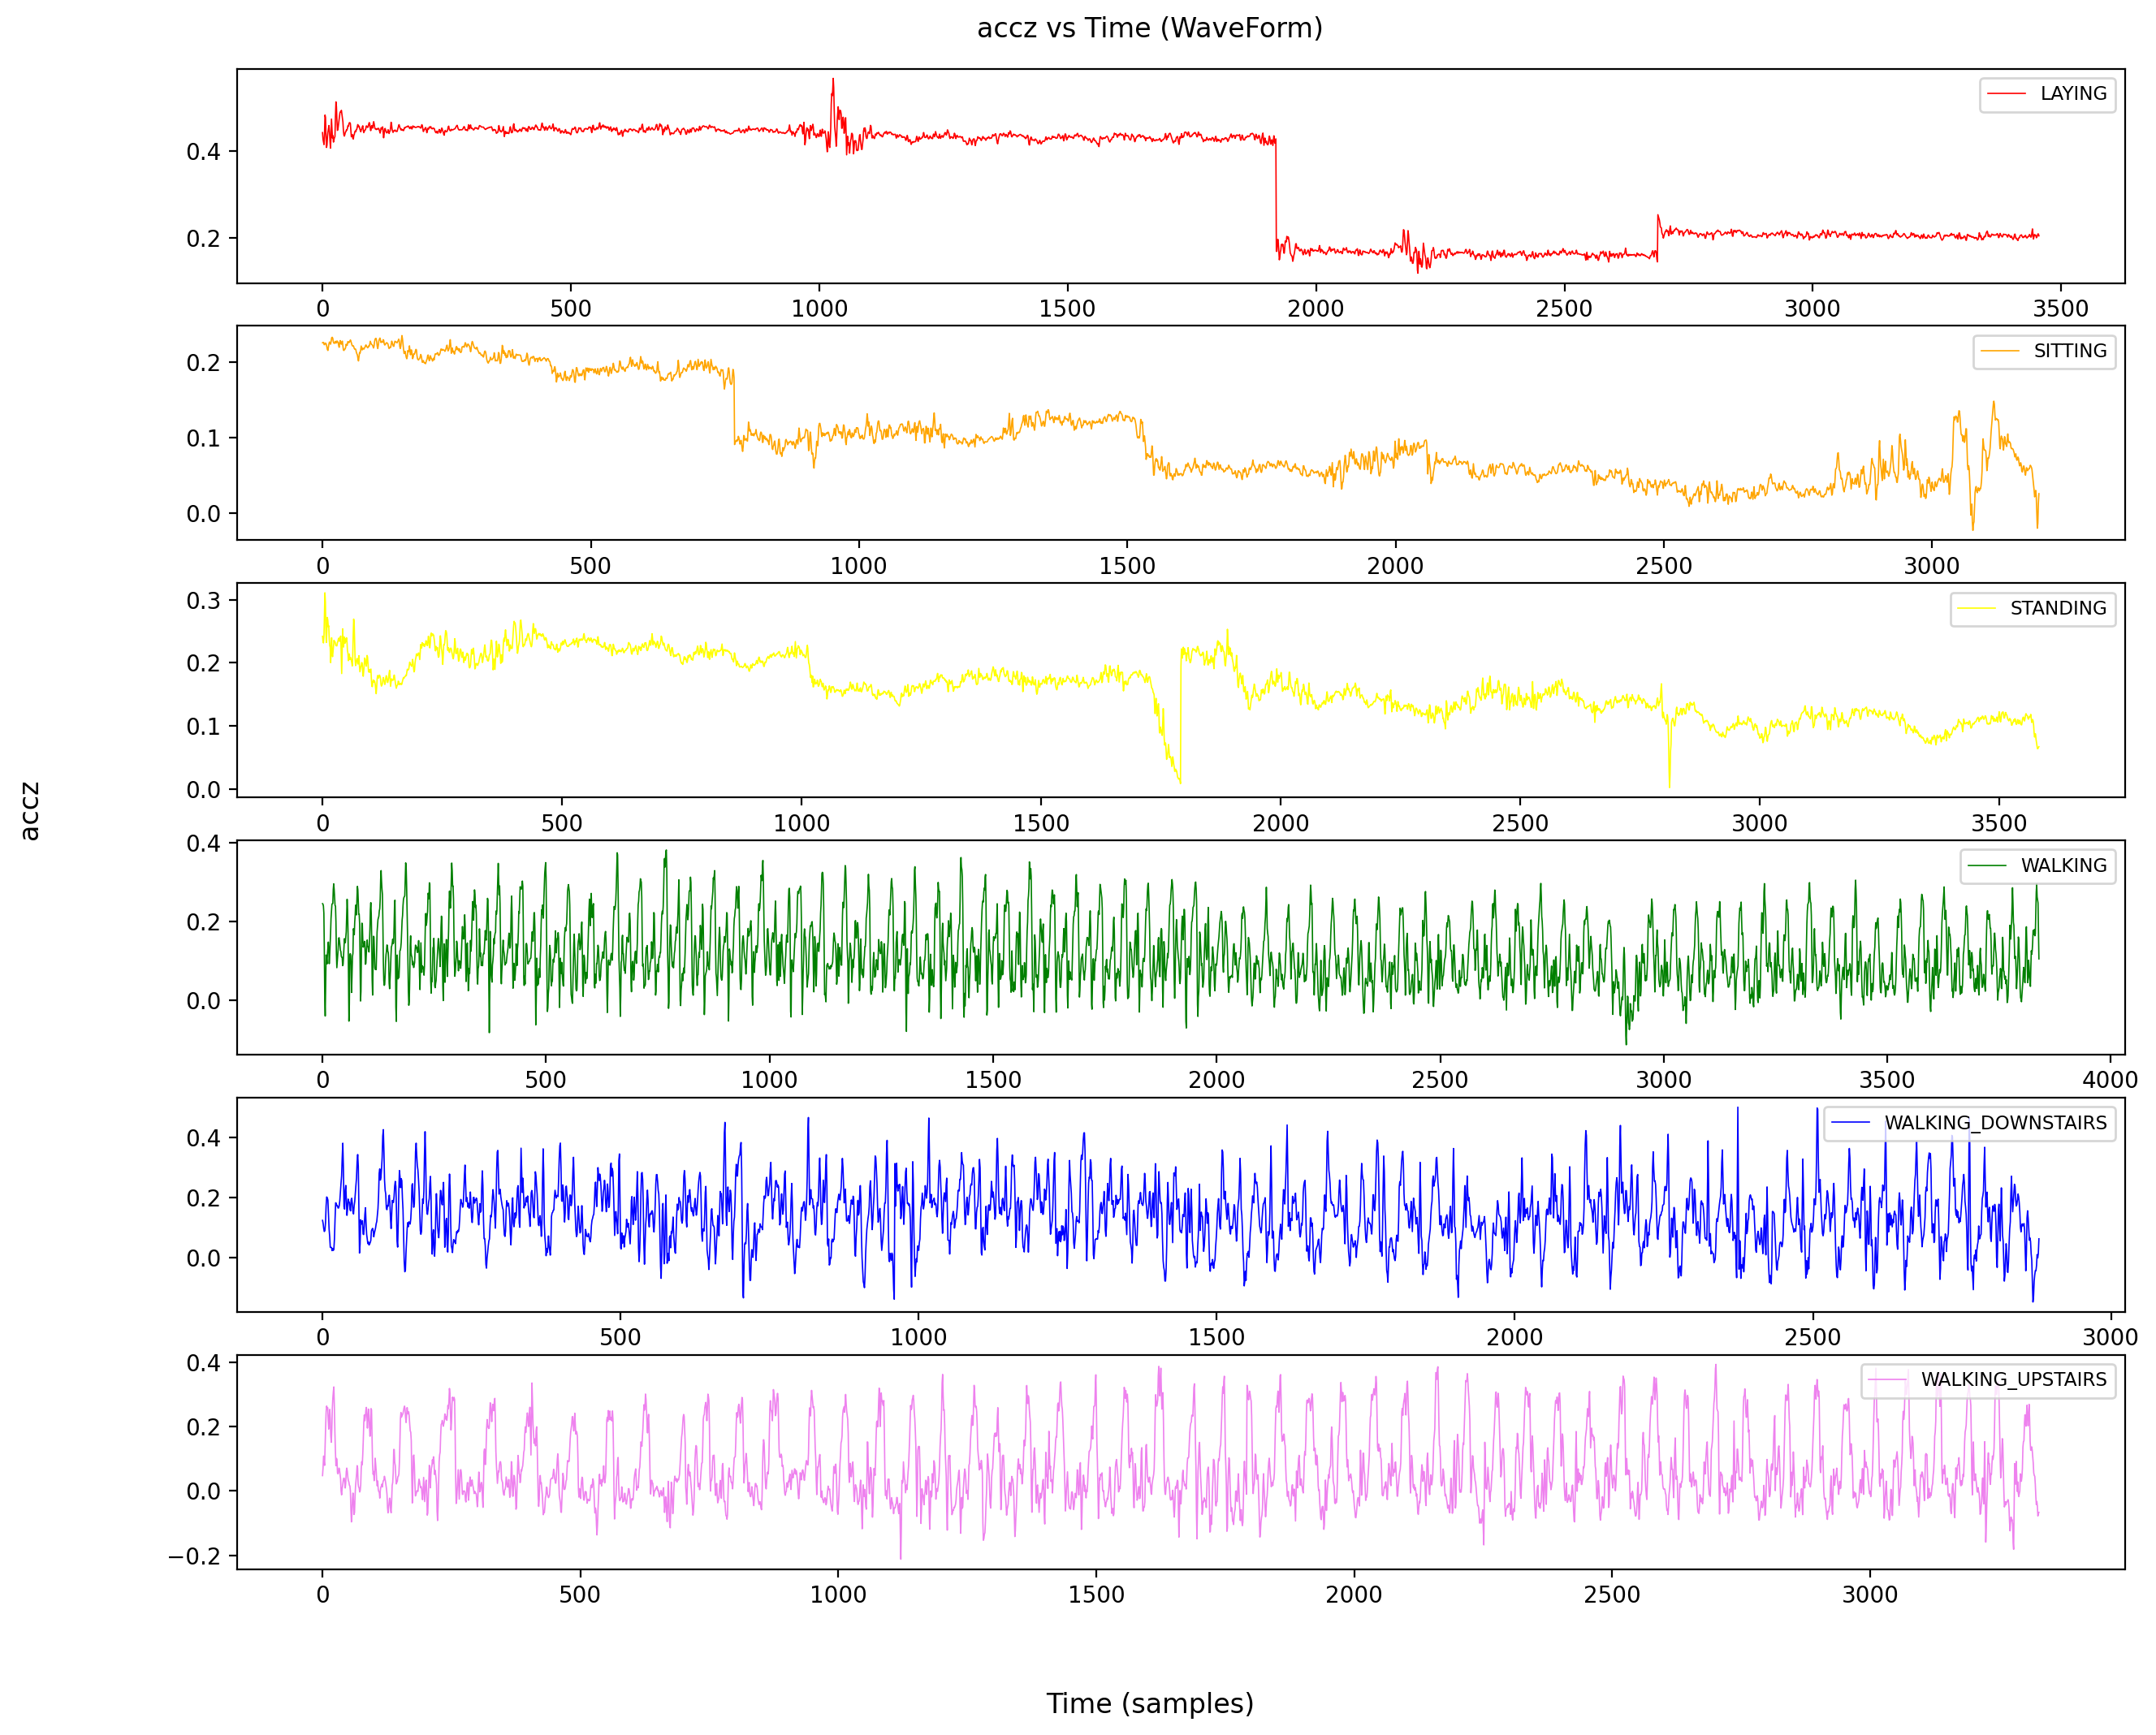

In [13]:
activities = ["LAYING", "SITTING", "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'violet']
axes = ['accx', 'accy', 'accz']

dfs = []
for act in activities:
    dfs.append(
        pd.read_csv(os.path.join("HAR", "Combined", "Test", act, "subject_4.csv"))
    )

for j, axis in enumerate(axes):
    fig, ax = plt.subplots(nrows = 6, figsize = (15, 12))
    for i, (df, label, color) in enumerate(zip(dfs, activities, colors)):
        ax[i].plot(df[axis], label = label, color = color, lw = 0.6)
        ax[i].legend(loc = 'upper right', fontsize = 'small')
    fig.text(0.04, 0.5, f'{axis}', va = 'center', ha = 'center', rotation = 'vertical', fontsize = 12)
    fig.text(0.5, 0.04, 'Time (samples)', va = 'center', ha = 'center', fontsize = 12)
    fig.text(0.5, 0.9, f'{axis} vs Time (WaveForm)', va = 'center', ha = 'center', fontsize = 12)
    plt.show()

**Conclusion:** It is definitely possible for the model to classify between laying, sitting, standing, and walking. As those actions have clearly distinguishable pattern in accx, accy, and accz. Classifying between walking normally, downstairs and upstairs might pose a challenge, though there are some feature that distinguish them too.

**2. Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration ($acc_x^2+acc_y^2+acc_z^2$) for each activity and justify your answer. *[0.5 marks]***

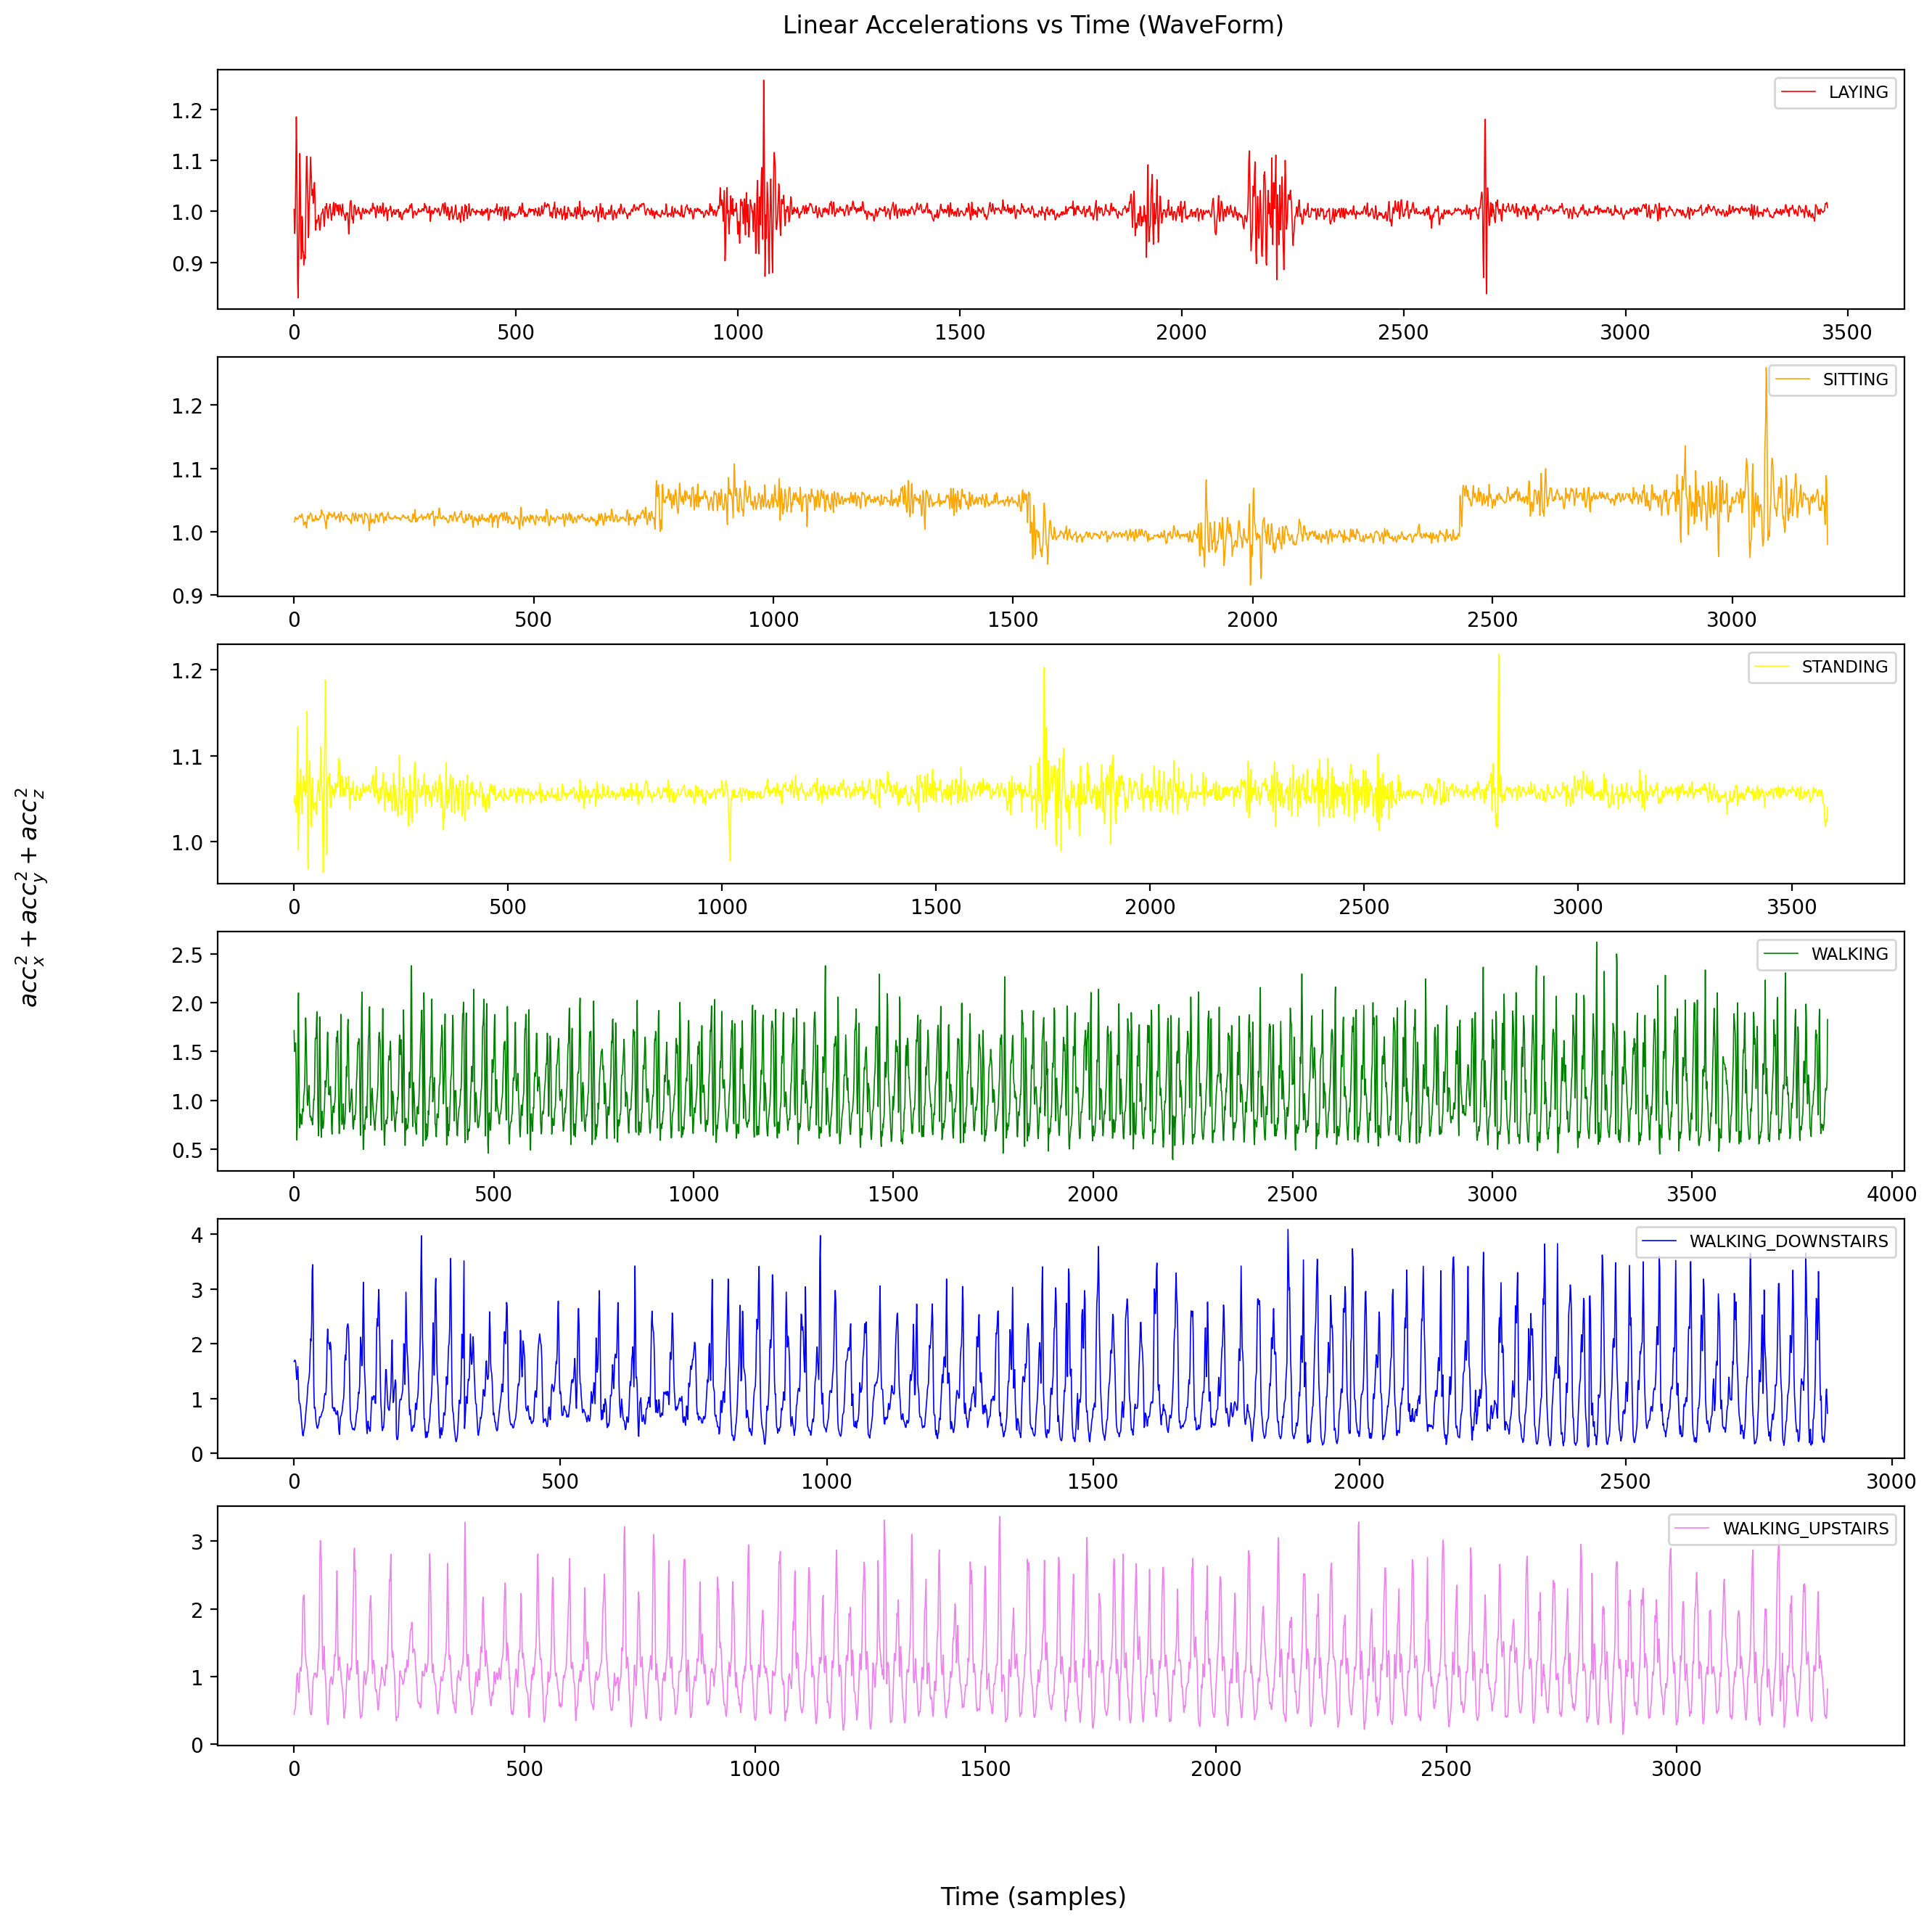

In [14]:
las = [(df['accx']**2 + df['accy']**2 + df['accz']**2) for df in dfs]

fig, ax = plt.subplots(nrows = 6, figsize = (15, 15))

for i, (la, label, color) in enumerate(zip(las, activities, colors)):
    ax[i].plot(la, label = label, lw = 0.6, color = color)
    ax[i].legend(loc = 'upper right', fontsize = 'small')

fig.text(0.04, 0.5, '$acc_x^2+acc_y^2+acc_z^2$', va = 'center', ha = 'center', rotation = 'vertical', fontsize = 12)
fig.text(0.5, 0.04, 'Time (samples)', va = 'center', ha = 'center', fontsize = 12)
fig.text(0.5, 0.9, f'Linear Accelerations vs Time (WaveForm)', va = 'center', ha = 'center', fontsize = 12)
plt.show()

**Conclusion:** From the above graphs, it is clear that distinction between static and dynamic can be made by observing flutuations in the linear acceleration. But we need ML models for to detect and distinguish between the subclasses.

**3.Visualize the data using PCA. *[1 marks]***

- **Use PCA (Principal Component Analysis) on Total Acceleration $(acc_x^2+acc_y^2+acc_z^2)$ to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities.**
- **Next, use [TSFEL](https://tsfel.readthedocs.io/en/latest/) ([a featurizer library](https://github.com/fraunhoferportugal/tsfel)) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.**
- **Now use the features provided by the dataset and perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.**
- **Compare the results of PCA on Total Acceleration, TSFEL and the dataset features. Which method do you think is better for visualizing the data?**

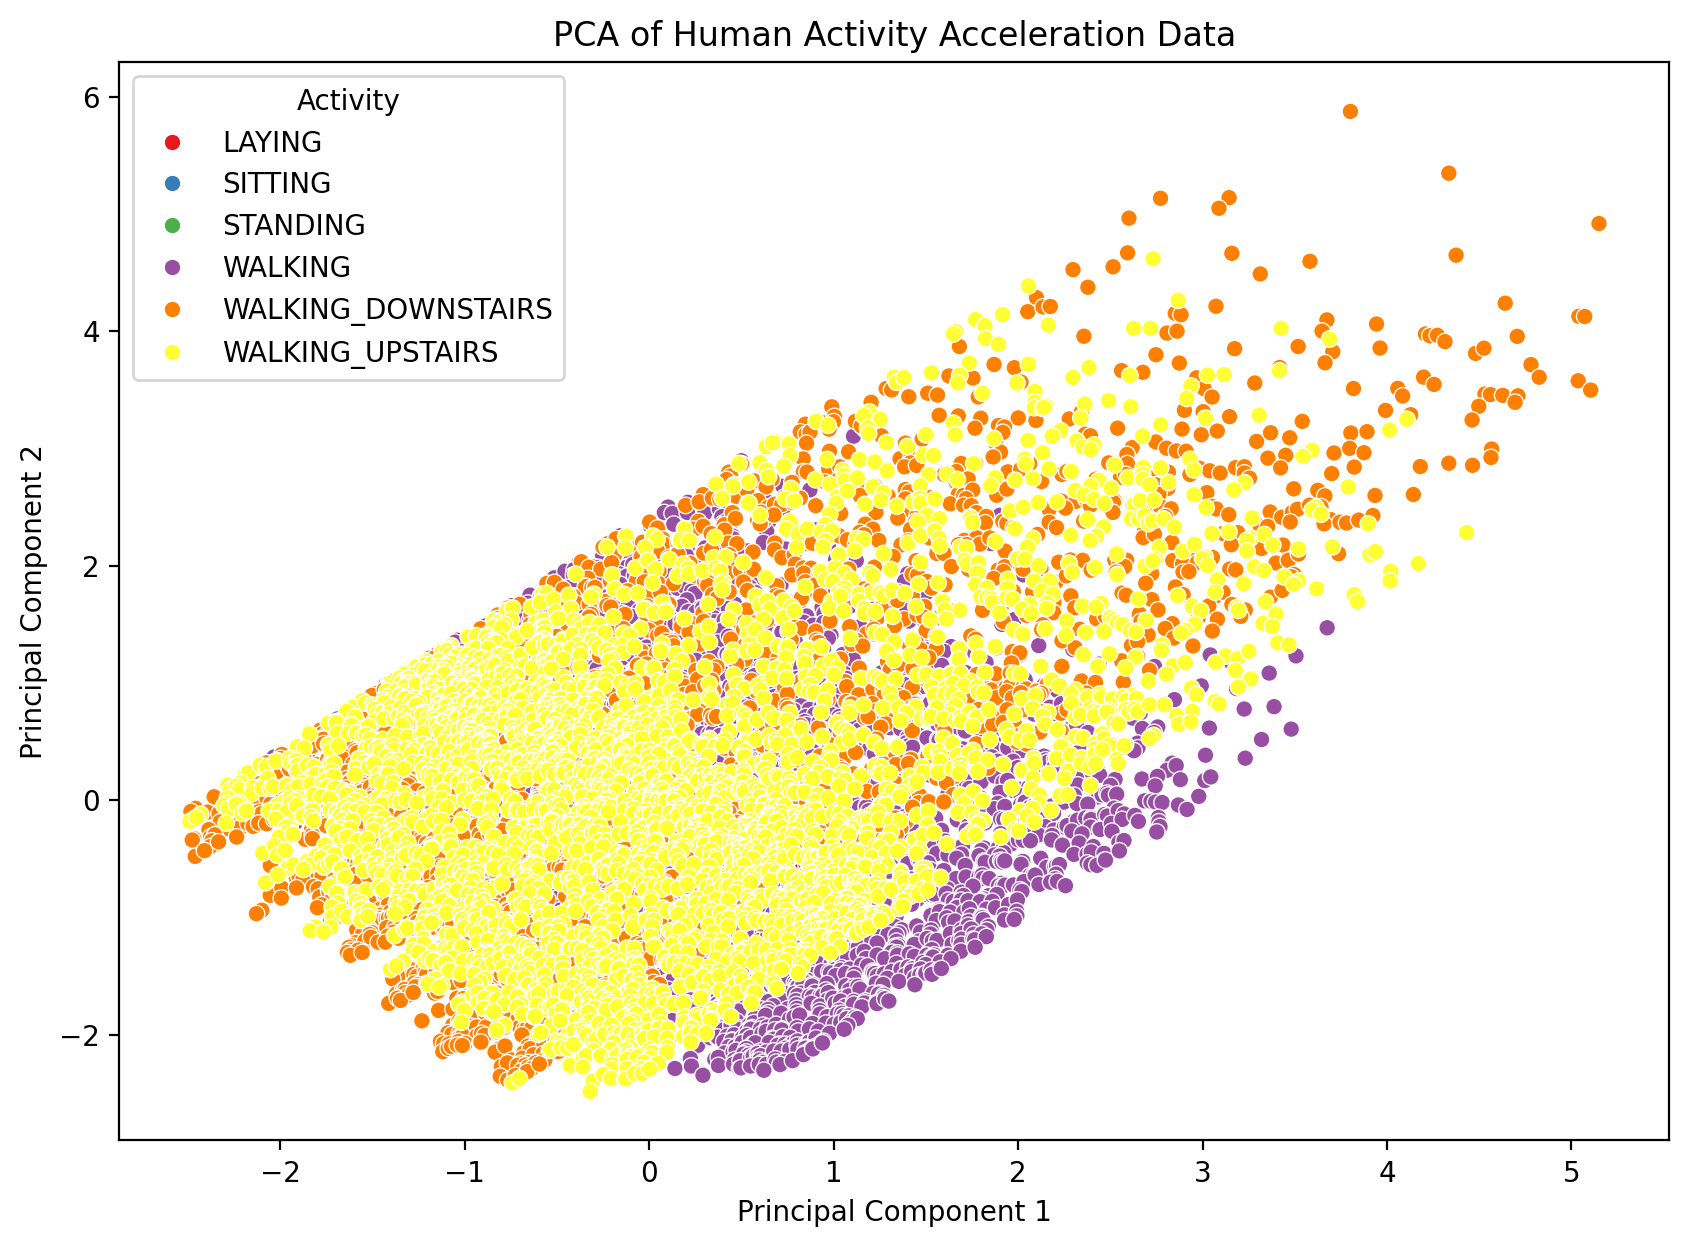

In [17]:
las_df = pd.DataFrame(np.concatenate(las), columns=['total_acc'])
las_df['activity'] = np.repeat(activities, [len(l) for l in las])
las_df['time'] = las_df.groupby('activity').cumcount()

# Step 2: Perform PCA
X = las_df[['total_acc', 'time']]
y = las_df['activity']

# Normalize the data
X = (X - X.mean()) / X.std()

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['activity'] = y.values

# Step 3: Plot the results
plt.figure(figsize=(10, 7))
sns.scatterplot(data=principal_df, x='PC1', y='PC2', hue='activity', palette='Set1')
plt.title('PCA of Human Activity Acceleration Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Activity')
plt.show()

In [18]:
las_df = pd.DataFrame(np.concatenate(las), columns=['total_acc'])
las_df['activity'] = np.repeat(activities, [len(l) for l in las])
las_df['time'] = las_df.groupby('activity').cumcount()

# Step 2: Perform PCA using SVD
X = las_df[['total_acc']]
y = las_df['activity']

# Standardize the data
X = (X - X.mean()) / X.std()

# Apply SVD
U, S, VT = np.linalg.svd(X, full_matrices=False)

PC_indices = np.argsort(S)[-2:][::-1]
principal_components = VT[PC_indices]

# Project data onto the principal components
X_pca = np.dot(X, principal_components.T)

# Create a DataFrame with PCA results and labels
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['activity'] = y.values

# Plotting
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='activity', palette='Set1')
plt.title('PCA of Human Activity Acceleration Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Activity')
plt.show()

ValueError: Shape of passed values is (20288, 1), indices imply (20288, 2)

**4. Calculate the correlation matrix of the features obtained by TSFEL and provided in the dataset. Identify the features that are highly correlated with each other. Are there any redundant features? *[1 marks]***